# Single Model Energy-depedent Classification Performance Analysis

In [1]:
%matplotlib inline

# Simply Run the usual experiment, using -L option to specify the model to load
# Sets up the model and the data

%run -im CaloDNN.ClassificationExperiment -- --NoAnalysis --NoTrain --cpu -L CaloDNN_512_2_Merged.2

Using CPU.
HyperParameter Scan:  20 possible combiniations.
______________________________________
ScanConfiguration
______________________________________
Picked combination:  0
Combo[0]={'Width': 32, 'Depth': 1}
Model Filename:  CaloDNN_32_1
______________________________________
Using PremixGenerator.

Using Theano backend.



Loading Model From: CaloDNN_512_2_Merged.2
Output Directory: TrainedModels/CaloDNN_512_2_Merged.2.1
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
flatten_1 (Flatten)              (1024, 15625)         0           flatten_input_1[0][0]            
____________________________________________________________________________________________________
activation_1 (Activation)        (1024, 15625)         0           flatten_1[0][0]                  
____________________________________________________________________________________________________
dense_1 (Dense)                  (1024, 512)           8000512     activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (1024, 512)           0           dense_1[0][0]           

In [2]:
# Preload the data, adding target which contains the energy
Test_genC.datasets+=["target"]
Test_genC.preprocessfunction=ConstantNormalization(Norms+[1.])
Test_genC.PreloadData()

Test_X_ECAL, Test_X_HCAL, Test_Y, target = tuple(Test_genC.D)


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


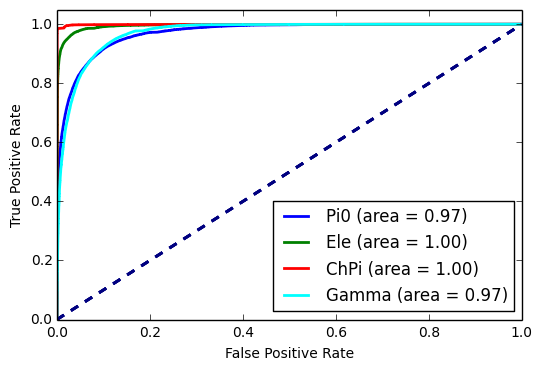

In [3]:
# Make the ROC Curves
# Also performs inference on the test data, returning the results
from DLAnalysis.Classification import *
result,NewMetaData=MultiClassificationAnalysis(MyModel,[Test_X_ECAL,Test_X_HCAL],Test_Y,BatchSize,
                                                       IndexMap={0:'Pi0', 2:'ChPi', 3:'Gamma', 1:'Ele'})

In [4]:
# Bin the data
Energy=target[:,:,2].flatten()

def AUCvsEnergy(E_min=10.,E_max=510.,E_bins=100.):
    BD,E_binning=BinDataIndex(Energy, E_min, E_max, E_bins)
    # Run the Classification Analysis in Bins
    return BinMultiClassificationAnalysis(MyModel,Test_Y=Test_Y,Y_binning=E_binning,
                                          bin_indecies=BD, result=result,
                                          IndexMap={0:'Pi0', 2:'ChPi', 3:'Gamma', 1:'Ele'})

/Library/Python/2.7/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


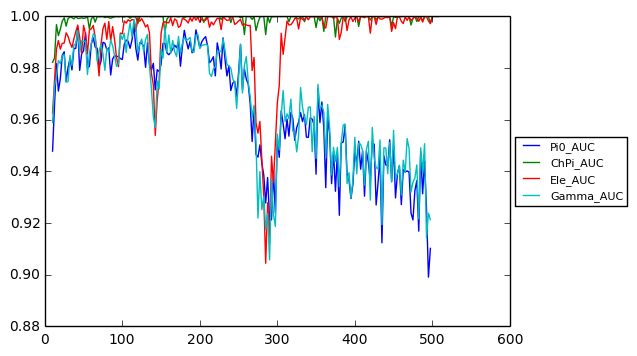

In [5]:
# Full Energy Range
Res=AUCvsEnergy(10.,510.,200.)

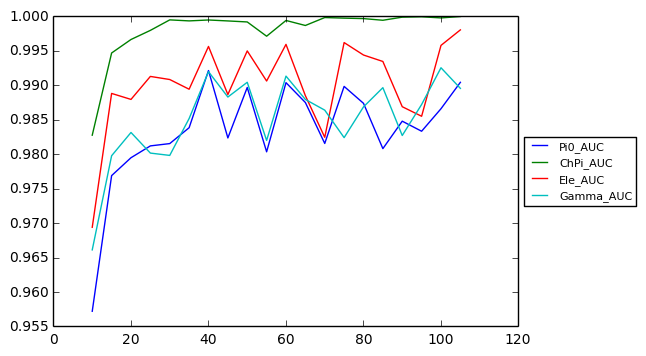

In [6]:
# 10 to 100 GeV
Res=AUCvsEnergy(10.,110.,20.)

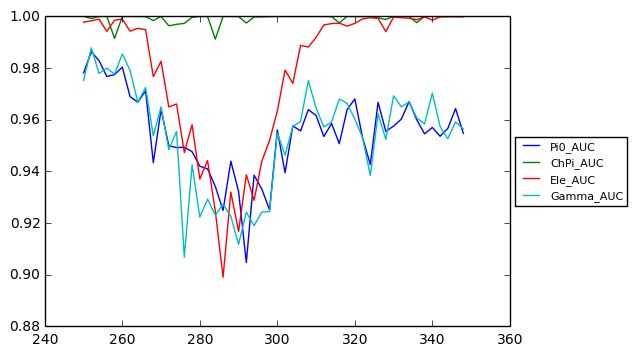

In [7]:
# 250 to 350 GeV
Res=AUCvsEnergy(250.,350.,50.)